# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


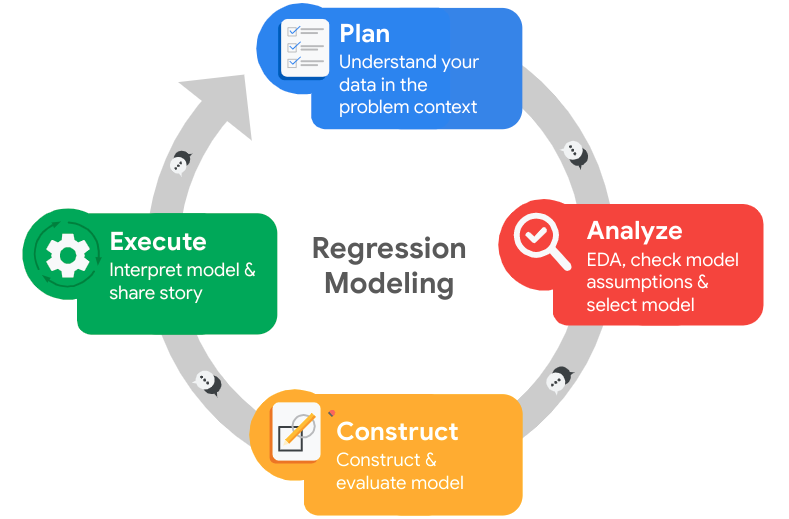

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [13]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [14]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [15]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [16]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [17]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [18]:
# Rename columns as needed
### YOUR CODE HERE ###

df0 = df0.rename(columns={'Work_accident': 'work_accident', 'average_montly_hours': 'average_monthly_hours', 'time_spend_company': 'tenure', 'Department':'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [19]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

* There are no missing values.

### Check duplicates

Check for any duplicate entries in the data.

In [20]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

3008 rows are duplicated.

In [21]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


It seems that some employees may have the same satsifaction level, further analysis can lead an insight about it. Bayes's theorem can be used to find the likelihood of such events. For further analysis, let's drop the duplicates.

In [22]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df1 = df0.drop_duplicates(keep='first')
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

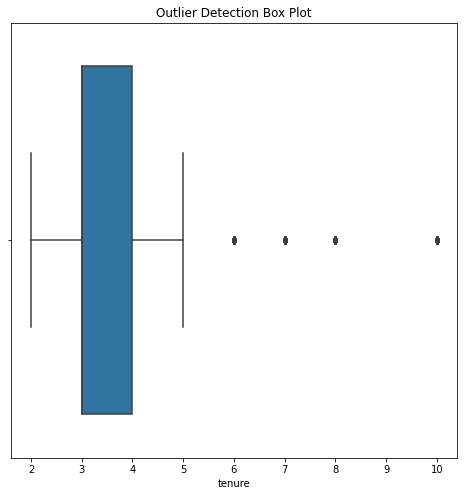

In [23]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(8,8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.boxplot(x=df1['tenure'])
plt.title('Outlier Detection Box Plot')
plt.show()


The above plot shows outliers in tenure variable using boxplot.

In [24]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# 25th Percentile
percentile25 = df1['tenure'].quantile(0.25)

# 75# Percentile
percentile75 = df1['tenure'].quantile(0.75)

# interquartile

iqr=percentile75 - percentile25

# Upper and lower limit for non-outlier

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# subset of data containing outlier

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print("Number of rows in the data containing outlier in 'tenure:'", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outlier in 'tenure:' 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [25]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

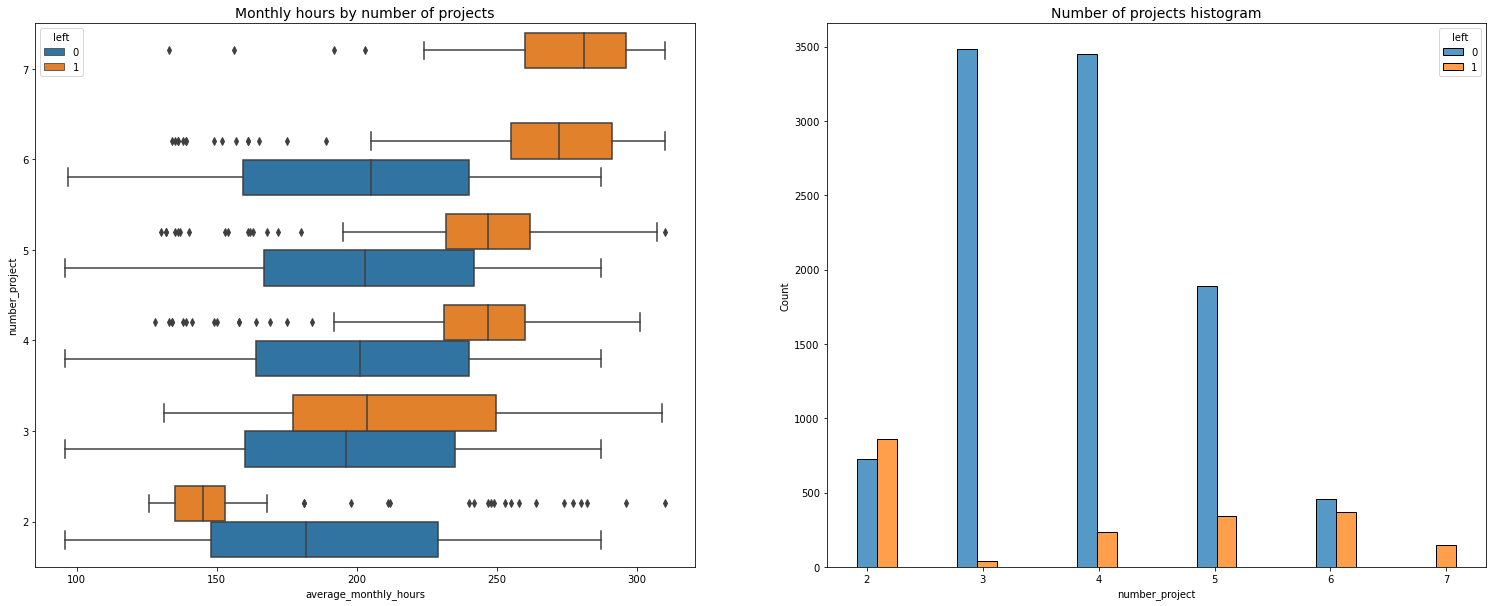

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2 ,figsize = (26,10))

# Boxplots

sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0] )
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize = '14')

# Histogram

tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1] )
ax[1].set_title('Number of projects histogram', fontsize ='14')

plt.show()

- It appears that people who work on more projects spend a lot of hours. 

- There are however employees who left the company while they work less than other employees, and another group which work more hours. It is plausible that those who work less hours were fired or about to leave job. The other group which worked long hours they most likely quit due to the work load.

- Employees with 7 projects left the company, and the optimal project is between 3-4.

- Considering 40hr/wk and two weeks vacations per year, the average employee works around 166.67 hours per month. However, in the data found it is considerably higher than the standard hours.

In [27]:
 # value counts of employees who stayed vs left
df1[df1['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

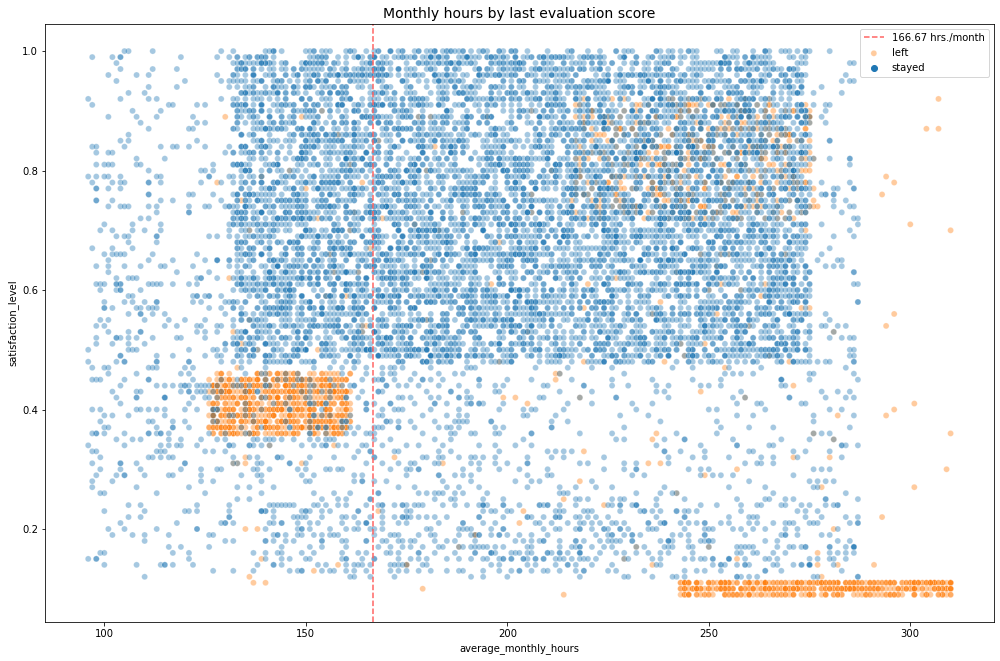

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###
plt. figure(figsize=(17,11))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./month', ls='--')
plt.legend(labels=['166.67 hrs./month', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

There are sizeable employees who worked more than 300 hours per month and their satisfaction level is also very close to zero. It is interesting to note that most of the employees worked more than the average weekly hours. 

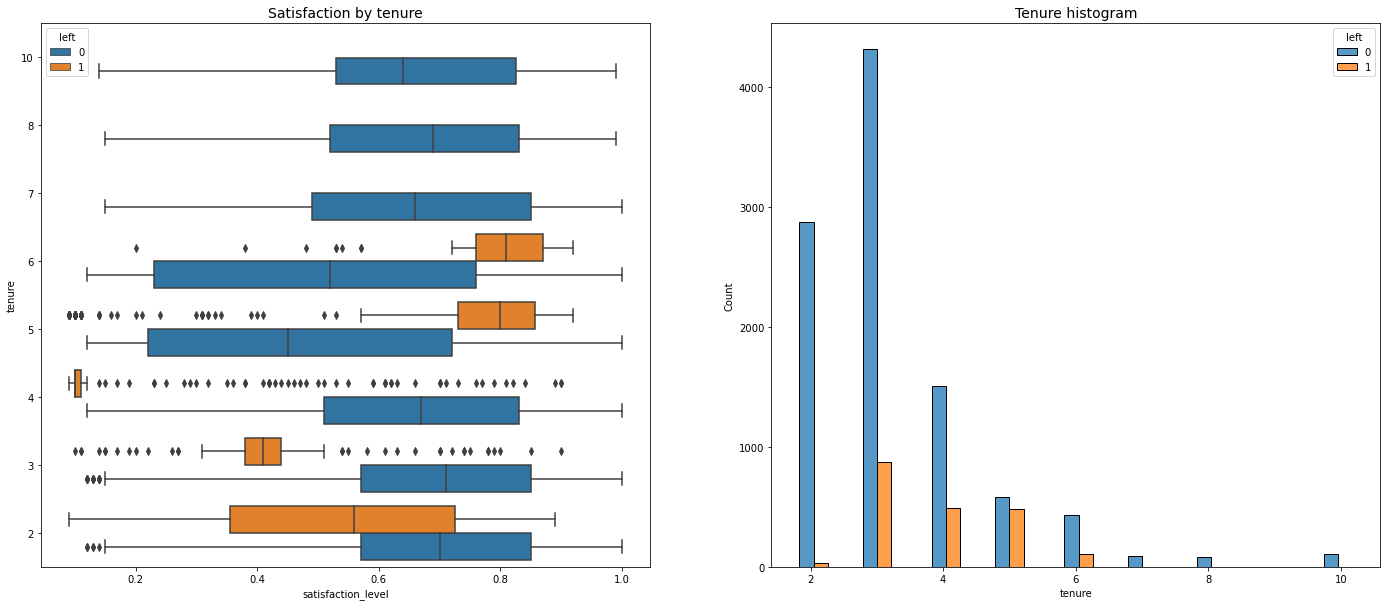

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (24,10))
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Histogram
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==0]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5,ax=ax[1] )
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

- Employees who left around 4 year tenure have a low satsifaction level, it is worth investigating further the reason behind this.

- Employees with longest tenure didn't leave and their satisfaction is also similar to new employees.



In [30]:
# Mean and Median satisfaction score

df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The mean and median value of satisfaction level for employees who left the company is considerably lower than who stayed.

Text(0.5, 1.0, 'Salary histogram by tenure: long-tenured people')

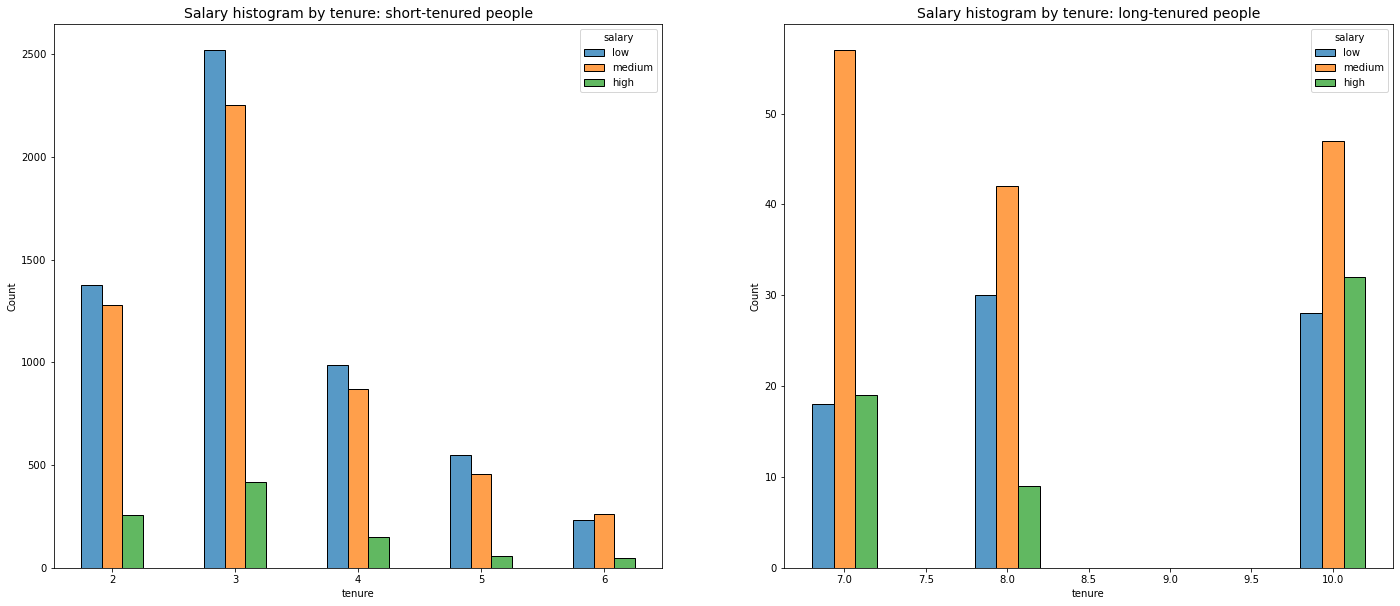

In [31]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax =plt.subplots(1,2, figsize=(24,10))

# short tenured  and long tenure employees

tenure_short = df1[df1['tenure'] <7 ]
tenure_long = df1[df1['tenure'] >6 ]

# plt histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize = '14')

sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize = '14')


- Long tenured employees have a higher salary than short tenured employees.

Text(0.5, 1.0, 'Monthly hours by last evaluation scorfe')

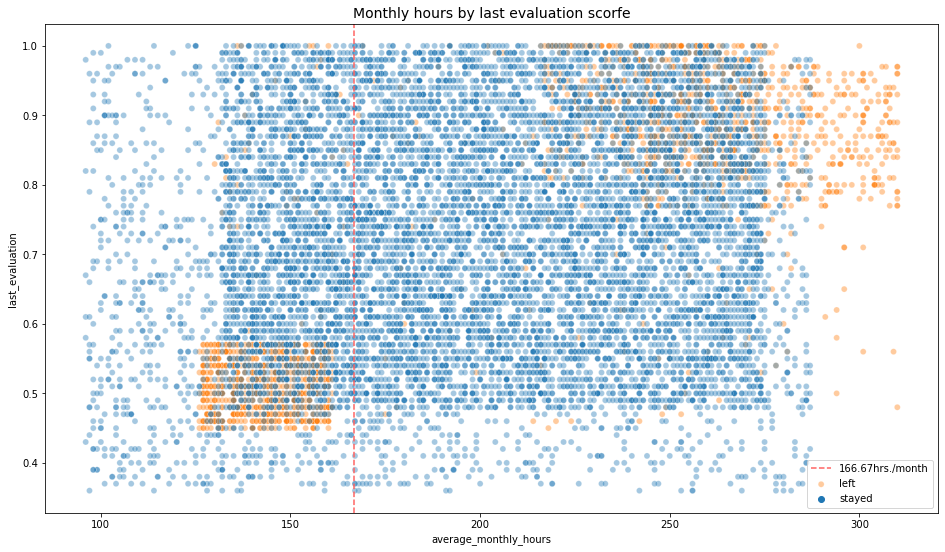

In [32]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation',hue='left', alpha=0.4 )
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./month', ls='--')
plt.legend(labels=['166.67hrs./month', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation scorfe', fontsize='14')

- The scatter plot shows employees who left that are overworked and higher evaluation score, and employees who have lower evaluation score and worked less than the average hours per month.

- The plot shows a correlation between hours worked and evaluation score.

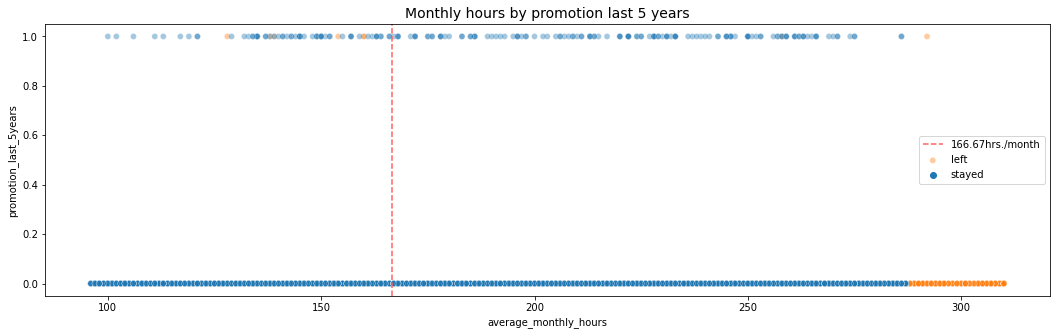

In [33]:
# Create a plot as needed
### YOUR CODE HERE ###
# Plot average_monthly_hours and promotion_last_5 years
plt.figure(figsize=(18,5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67hrs./month', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

- Employees who worked the most hours were not promoted as much.
- Small number of employees left were promoted.
- Employees who left the company worked the longest hours.

In [34]:
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Text(0.5, 1.0, 'Counts of stayed/left by department')

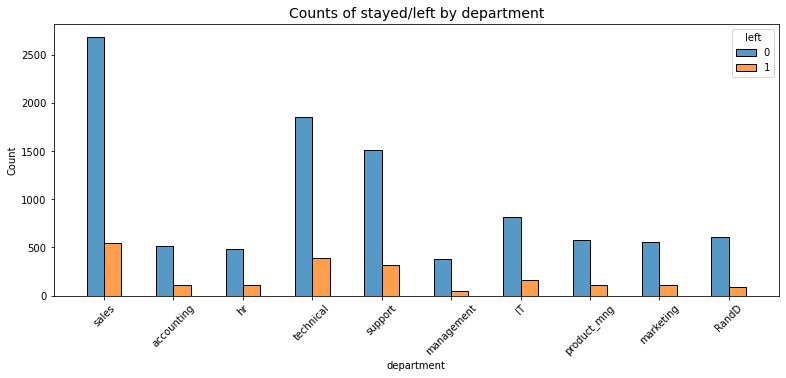

In [35]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(13,5))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
            hue_order=[0,1], multiple='dodge', shrink=0.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14)

The trend is the same across departments.

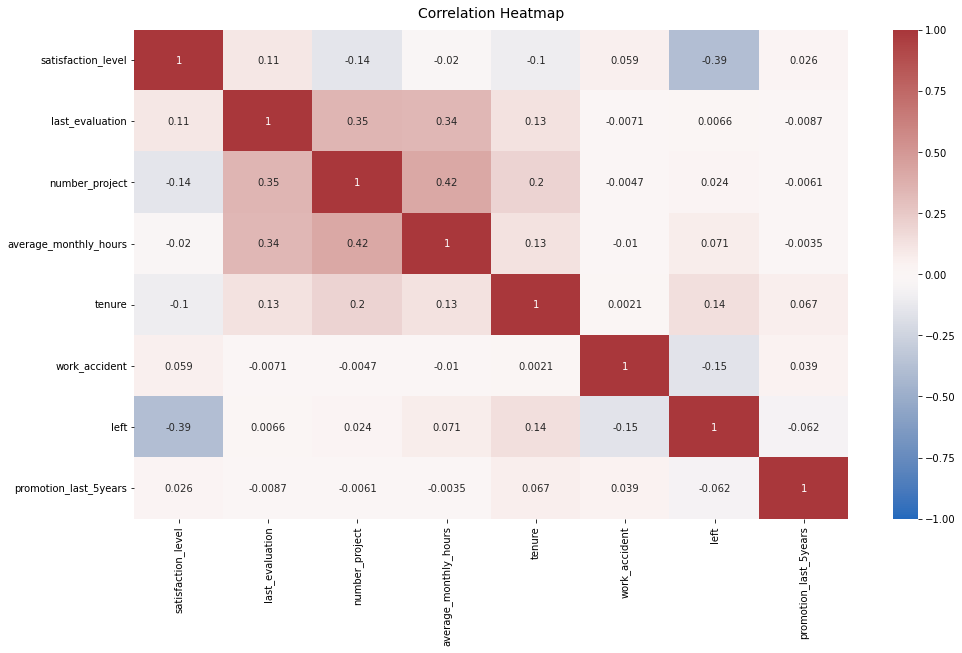

In [36]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a categorical variable prediction and Logistic regression or Tree-based machine learning models are appropriate.

### Identify the types of models most appropriate for this task.

Impletemntation of logistic regression

Binomial logistic regression is better suited for this model since the problem is categorical. 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [37]:
### YOUR CODE HERE ###
df_enc = df1.copy()

# encode salary as ordinal numeric 
df_enc['salary'] = (
df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
    
)

df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


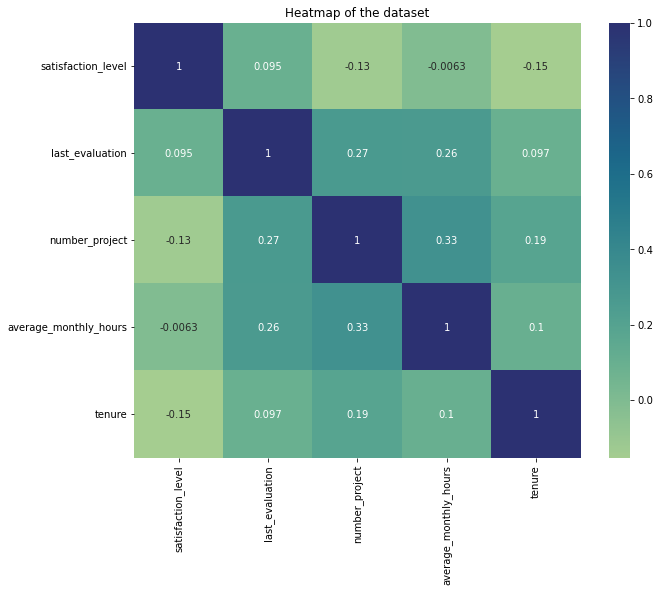

In [38]:
# Heatmap 
plt.figure(figsize = (10,8))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

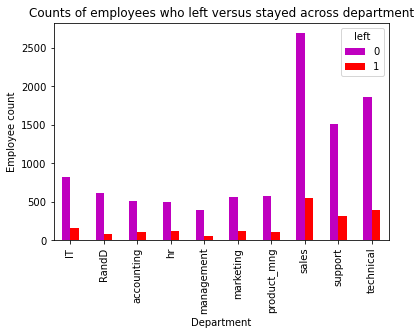

In [39]:
# stacked bar plt

pd.crosstab(df1['department'], df1['left']).plot(kind='bar', color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Remove outliers because logistic regression is sensitive to outliers.

In [40]:
# selecting rows without outliers

df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
# Isolate outcome variable

y= df_logreg['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [42]:
# select features for the model

X= df_logreg.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, stratify=y, random_state=42)

In [49]:
log_clf=LogisticRegression(random_state=42, max_iter=500).fit(X_train,y_train)

In [45]:
y_pred=log_clf.predict(X_test)

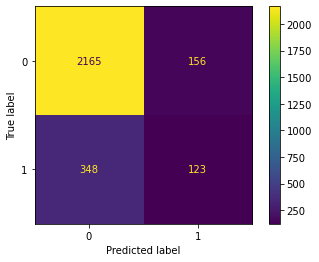

In [47]:
# Confusion maxtrix

log_cm= confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)

log_disp.plot(values_format = '')

plt.show()

-The true negatives shown in upper left quadrant and upper right shows false positives. The bottom left quadrant sows false negatives while the right bottom quadrant shows true positives.

- True Negatives; Employees who did not leave and the model predicted the same.

- False Negatives: Employees who left the company but the model predicted did not leave.

- False Positives: Employees who did not leave but the model predicted as leaving.

- True Positives: Employees who are leaving and the model predicted the same.


In [50]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

It is fairly a balanced data in 83 %-17 %  split

In [51]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The logistic regression  model has a precision of 79%, recall of 82%, f1 score of 80%, and accuracy of 82%. The important parameter is to predict employees who leave, then the score is very low .

## Modeling Approach B: Tree Based Model

This approach implements Decision Tree and Random Forest

In [52]:
# Isolate the outcome
y = df_enc['left']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [53]:
X=df_enc.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, stratify=y, random_state=0)


In [56]:
# Instantiate the model

tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters for search

cv_params = { 'max_depth' : [4,6,8, None],
             'min_samples_leaf': [2,5,1],
             'min_samples_split': [2,4,6]    
}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [57]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.83 s, sys: 0 ns, total: 2.83 s
Wall time: 2.83 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [58]:
# best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [59]:
# best score

tree1.best_score_

0.969819392792457

This is a very strong AUC score, the model predicts employees who leave very well.

In [60]:
def make_results(model_name:str, model_object, metric:str):
    '''
    model_name: name of the model it is   string
    model_objcet: a fit object
    metric: precision, recall, accuracy, f1, 
    Returns a pandas df with the metrics.
    '''
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    # extract the metrics
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
    return table

In [61]:
# CV Scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


The model predicts very well as per the metrics.

## Random Forest - 1

In [62]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             } 

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [64]:
%%time
rf1.fit(X_train, y_train) 

CPU times: user 9min 8s, sys: 0 ns, total: 9min 8s
Wall time: 9min 9s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [73]:
import os
path = 'C:/Users/bisay/Motor/'

In [74]:
def write_pickle(path, model_object, save_as:str):
    '''
    path: folder path
    model_object : model to be pickeled
    save_as: file name 
    
    '''
    with open(path +save_as+ '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [75]:
def read_pickle(path, save_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model


In [76]:
write_pickle(path, rf1, 'hr_rf1')


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/bisay/Motor/hr_rf1.pickle'

In [77]:
rf1 = read_pickle(path, 'hr_rf1')

rf1.best_score_
rf1.best_params_

NameError: name 'saved_model_name' is not defined

In [78]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)


              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The results are better than the decision tree model. 

In [81]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [82]:
rf1_test_scores = get_scores('Random forest test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Random forest test,0.964211,0.919679,0.941418,0.980987,0.956439


The test scores are similar to the validation scores. The model appears to be very strong.

## Feature Engineering

Create a new feature called overworked.

In [83]:
df2=df_enc.drop('satisfaction_level', axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [85]:
df2['overworked'] = df2['average_monthly_hours']
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


The max hour is significantly higher than that  of  166.67 based on 50 weeks per year, 8 hrs a day work schedule. Let's define overworked based on 175hr as optimum and anything beyond this hour is overworked.


In [86]:
df2['overworked'] = (df2['overworked'] > 175).astype(int)
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [87]:
df2['overworked'] = (df2['overworked'] > 175).astype(int)

df2['overworked'].head()

0    0
1    0
2    0
3    0
4    0
Name: overworked, dtype: int64

In [88]:
df2 = df2.drop('average_monthly_hours', axis =1)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [89]:
y=df2['left']

X=df2.drop('left', axis=1)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=0)

## Decision Tree - Round 2

In [91]:
tree = DecisionTreeClassifier(random_state=0)
# Dictionary of hyperparameters
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
# Assign dictionary of scoring metris to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree2= GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [92]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.22 s, sys: 0 ns, total: 2.22 s
Wall time: 2.22 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [93]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [94]:
tree2.best_score_

0.9564598419138554

In [95]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy      auc
0  decision tree2 cv   0.844484  0.898862  0.870651  0.955632  0.95646


This model performs very well.

## Random Forest - Round 2

In [96]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf2=GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [97]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: user 6min 40s, sys: 0 ns, total: 6min 40s
Wall time: 6min 40s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [99]:
write_pickle(path, rf2, 'hr_rf2')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/bisay/Motor/hr_rf2.pickle'

In [100]:
rf2 = read_pickle(path, 'hr_rf2')

NameError: name 'saved_model_name' is not defined

In [101]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [102]:
rf2.best_score_

0.9626098263824174

In [103]:
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy      auc
0  decision tree2 cv   0.844484  0.898862  0.870651  0.955632  0.95646
               model  precision   recall        F1  accuracy      auc
0  random forest2 cv   0.851347  0.86066  0.855515   0.95174  0.96261


In [104]:
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.832721,0.909639,0.869482,0.954636,0.936619


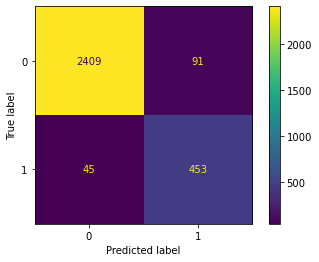

In [106]:
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, the model identifies that some employees as risk of quitting or getting fired, although that is not actually the case. However, the model is still strong.

#### Decision Tree Splits

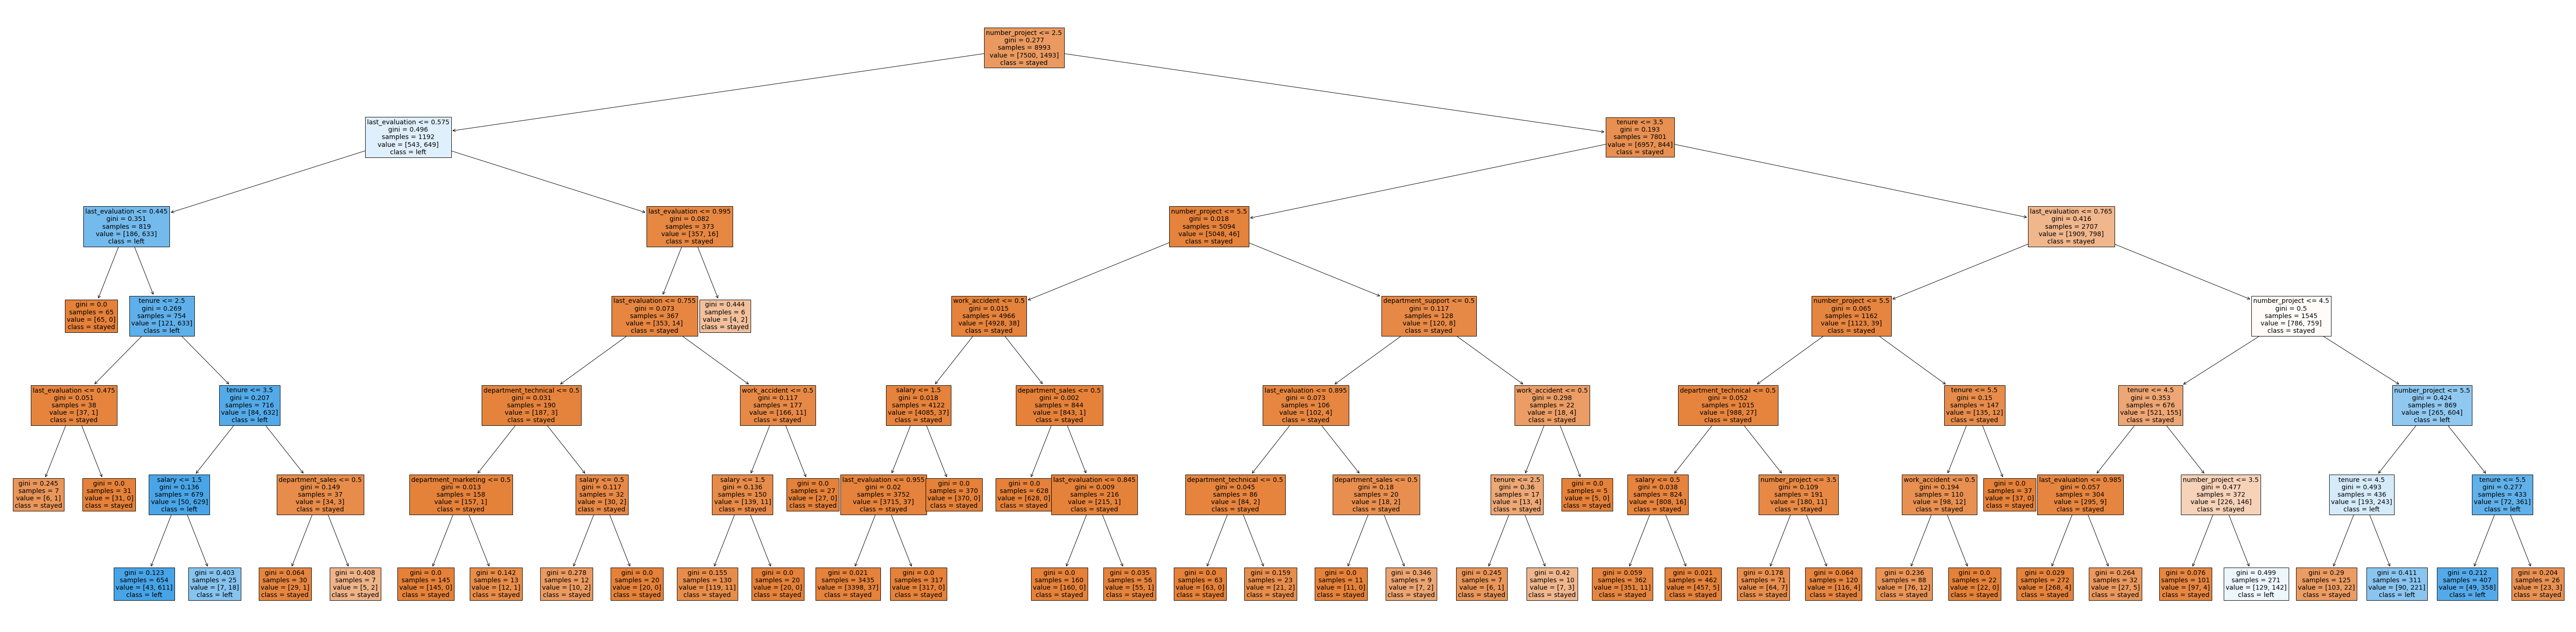

In [107]:
# plot the tree
plt.figure(figsize=(100,25))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision Tree Feature Importance

In [108]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns = ['gini_importance'], index=X.columns)
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# extract features with importances >0

tree2_importances = tree2_importances[tree2_importances['gini_importance'] !=0 ]
tree2_importances

,gini_importance
last_evaluation,0.356608
number_project,0.350883
tenure,0.288319
salary,0.001730
work_accident,0.000790
department_sales,0.000681
department_technical,0.000489
department_support,0.000423
department_marketing,0.000079


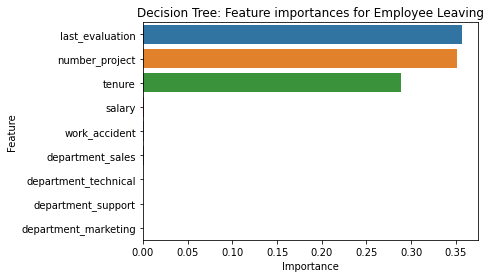

In [109]:
# Barplot to visualize the decision tree feature importances
sns.barplot(data=tree2_importances, x='gini_importance', y=tree2_importances.index, orient='h')
plt.title('Decision Tree: Feature importances for Employee Leaving', fontsize=12)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

In [ ]:
The decision tree shows that tenure, last_evaluation and number of project have high importances .

#### Random Forest Feature Importance

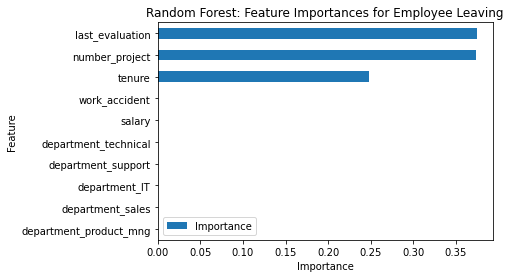

In [115]:
# feature importances

feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
-  Logistic regression model has a precision of 80%, recall of 83 % , f1-score of 80% and accuracy of 83 %.  

- Tree based decision tree model achieved 93.8% AUC, precision of 87%, recall of 90.4%, and f1-score of 88.7%, and accuracy of 96.2%. The random forest model performed very well compared to logistic regression.

### Conclusion, Recommendations, Next Steps

- Promoting employees who are with the company for 4 years more and then do further analysis.

- Reduce the number of projects that employees work on

- Bonus for employees who work longer hours or do not require employees to work longer hours.

- High evaluation score should be reserved for employees who work longer hours, for example more than 180hrs.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.